# Тестовое задание  Наска

### Импорты

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.metrics import accuracy_score
import xgboost as xgb

### Шаг 1: Генерация точек, напоминающих окружность

In [2]:
# функция генерирует окружность

def generate_circle_data(num_points, center, radius):
    angles = np.linspace(0, 2 * np.pi, num_points)
    x = center[0] + radius * np.cos(angles) + np.random.normal(0, 0.1, num_points)
    y = center[1] + radius * np.sin(angles) + np.random.normal(0, 0.1, num_points)
    return np.column_stack((x, y))
    

In [3]:
 # Создаём окружности

num_points = 10000
circle1 = generate_circle_data(num_points, center=(0, 0), radius=1)
circle2 = generate_circle_data(num_points, center=(2, 2), radius=1)

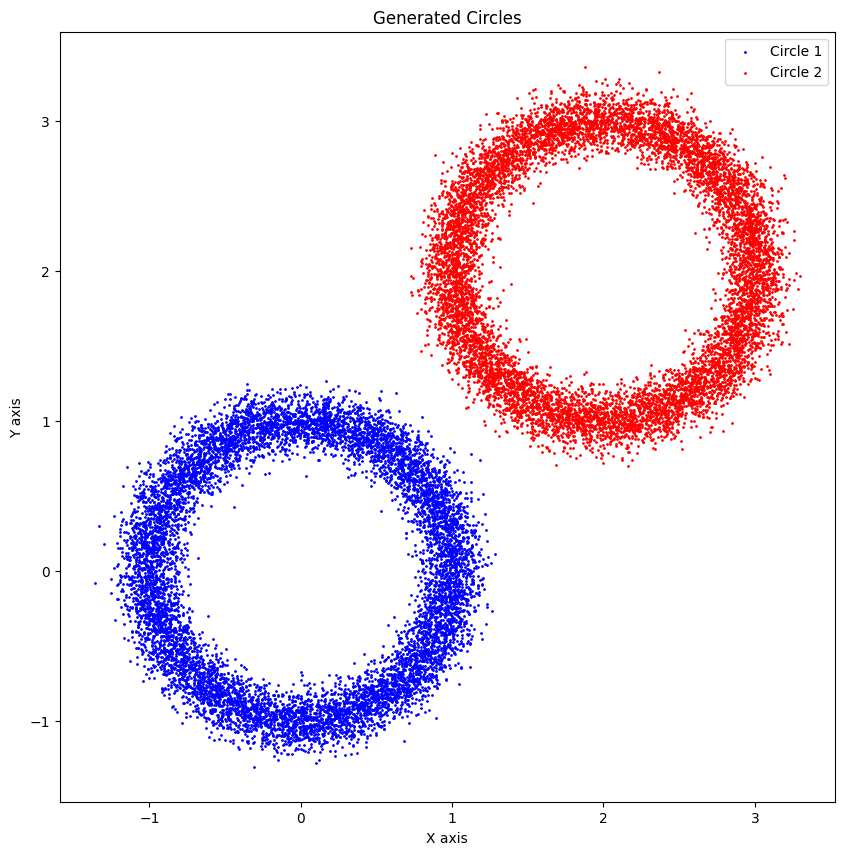

In [4]:
# Визуализируем окружности
plt.figure(figsize=(10, 10))
plt.scatter(circle1[:, 0], circle1[:, 1], s=1, c='blue', label='Circle 1')
plt.scatter(circle2[:, 0], circle2[:, 1], s=1, c='red', label='Circle 2')
plt.title('Generated Circles')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
plt.show()

### Шаг 2: Разметка точек

In [5]:
# Разметка точек

labels1 = np.zeros(num_points)  # Используем 0 для класса 1
labels2 = np.ones(num_points)   # Используем 1 для класса 2


### Шаг 3: Сдвиг второго ряда для пересечения с первым

In [6]:
# Сдвиг второго ряда для пересечения с первым
circle2 += np.array([-1, -1])  # Сдвигаем второй круг

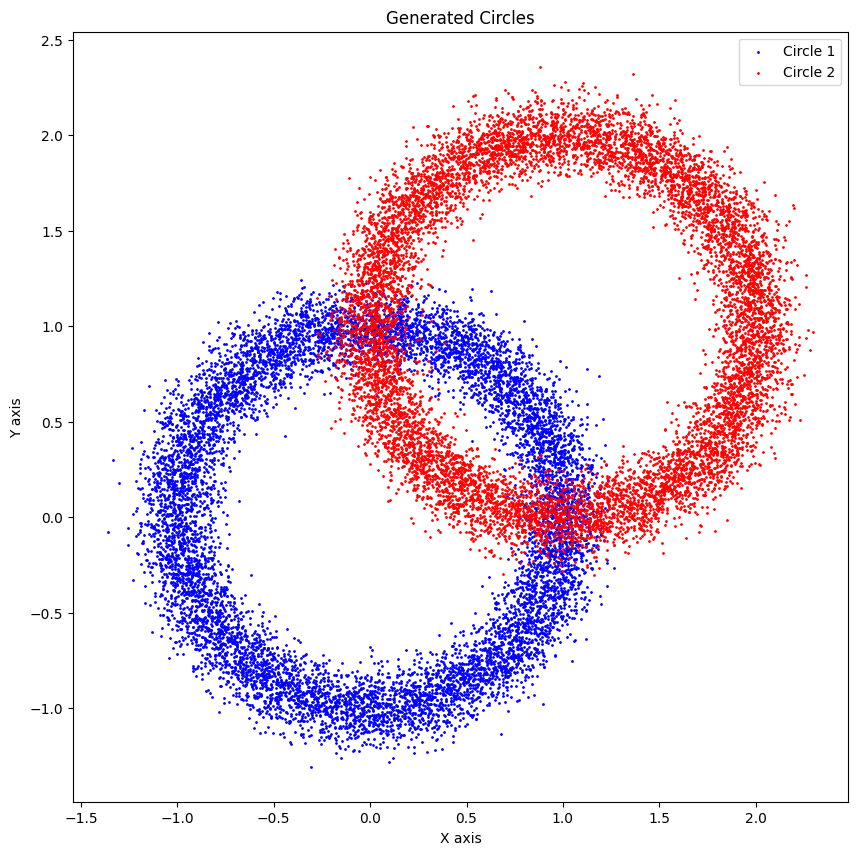

In [7]:
# Визуализируем окружности
plt.figure(figsize=(10, 10))
plt.scatter(circle1[:, 0], circle1[:, 1], s=1, c='blue', label='Circle 1')
plt.scatter(circle2[:, 0], circle2[:, 1], s=1, c='red', label='Circle 2')
plt.title('Generated Circles')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
plt.show()

### Шаг 4: Объединение и перемешивание рядов

In [8]:
#  Объединение и перемешивание рядов
data = np.vstack((circle1, circle2))
labels = np.hstack((labels1, labels2))

indices = np.random.permutation(data.shape[0])
data = data[indices]
labels = labels[indices]

### Шаг 5: Разделение данных на тренировочную и тестовую выборки

In [9]:
# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Преобразование данных в тензоры PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)


### Шаг 6: Обучение модели на тренировочной выборке

[0]	validation_0-logloss:0.62867	validation_0-error:0.15700	validation_1-logloss:0.62739	validation_1-error:0.14900
[1]	validation_0-logloss:0.57581	validation_0-error:0.15594	validation_1-logloss:0.57346	validation_1-error:0.14750
[2]	validation_0-logloss:0.53174	validation_0-error:0.15188	validation_1-logloss:0.52845	validation_1-error:0.14850
[3]	validation_0-logloss:0.49451	validation_0-error:0.15125	validation_1-logloss:0.49046	validation_1-error:0.14725
[4]	validation_0-logloss:0.46265	validation_0-error:0.15125	validation_1-logloss:0.45805	validation_1-error:0.14775
[5]	validation_0-logloss:0.43523	validation_0-error:0.15119	validation_1-logloss:0.43010	validation_1-error:0.14725
[6]	validation_0-logloss:0.41138	validation_0-error:0.15088	validation_1-logloss:0.40577	validation_1-error:0.14750
[7]	validation_0-logloss:0.39061	validation_0-error:0.15063	validation_1-logloss:0.38463	validation_1-error:0.14700
[8]	validation_0-logloss:0.37242	validation_0-error:0.15056	validation_1

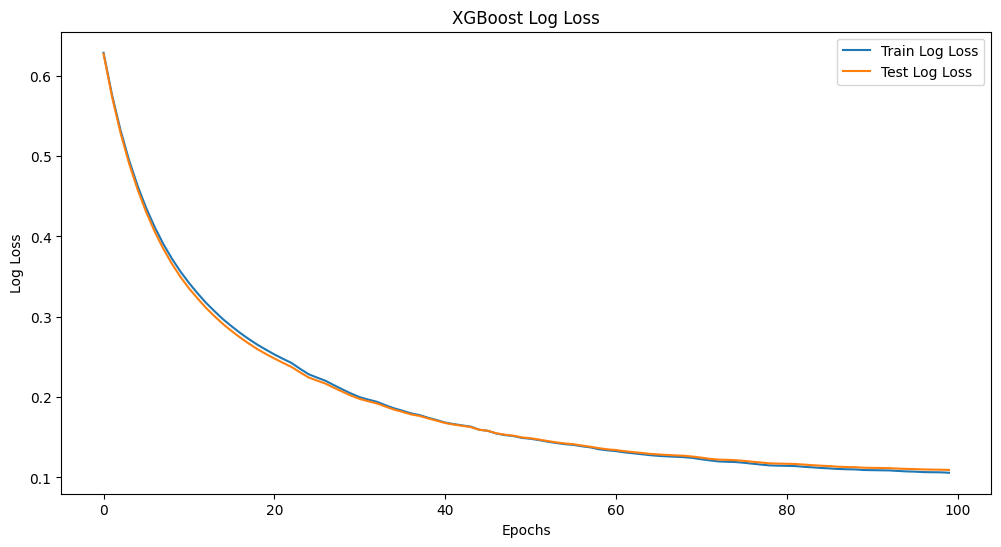

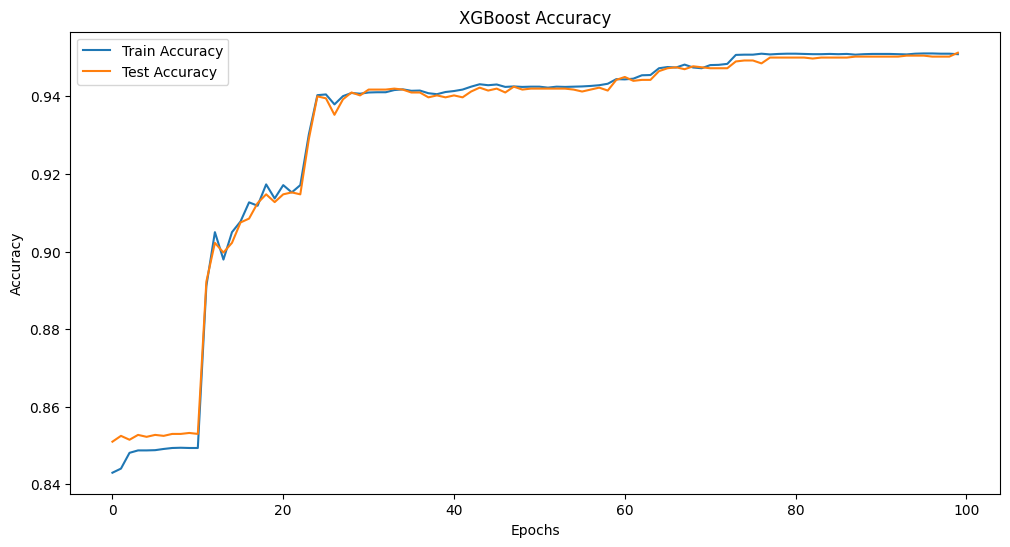

In [10]:
# Создание и обучение модели градиентного бустинга
eval_set = [(X_train, y_train), (X_test, y_test)]
model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42, eval_metric=['logloss', 'error'])

model.fit(X_train, y_train, eval_set=eval_set, verbose=True)

# Прогнозы и оценка точности
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Извлечение метрик для построения графиков
results = model.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

# Построение графика потерь
plt.figure(figsize=(12, 6))
plt.plot(x_axis, results['validation_0']['logloss'], label='Train Log Loss')
plt.plot(x_axis, results['validation_1']['logloss'], label='Test Log Loss')
plt.title('XGBoost Log Loss')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

# Построение графика точности
plt.figure(figsize=(12, 6))
plt.plot(x_axis, 1 - np.array(results['validation_0']['error']), label='Train Accuracy')
plt.plot(x_axis, 1 - np.array(results['validation_1']['error']), label='Test Accuracy')
plt.title('XGBoost Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Логарифмическая потеря: Логарифмическая потеря сначала высокая и снижается по мере обучения, что указывает на улучшение модели. Если логарифмическая потеря на тестовой выборке также снижается, это хороший знак, что модель хорошо обобщается.

Точность: Точность модели на тренировочной выборке увеличивается и достигает примерно 95%. Это означает, что модель хорошо обучилась и способна классифицировать точки с высокой точностью.

## Нейронная сеть

### Модель

In [11]:
# 
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 50)
        self.fc2 = nn.Linear(50, 100)
        self.fc3 = nn.Linear(100, 50)
        self.fc4 = nn.Linear(50, 2)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [12]:
# Шаг 5: Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Преобразование данных в тензоры PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

### Тренировка

In [13]:

model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Тренировка модели
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)  #
    loss.backward()
    optimizer.step()

# Шаг 7: Проверка работы модели на тестовой выборке и оценка точности
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    accuracy = accuracy_score(y_test_tensor.numpy() - 1, predicted.numpy())
    print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 3.50%


### Улучшение обучения

#### Используем  GPU  для ускорения обучения.

In [14]:
# Определение устройства (CPU или CUDA)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Используем ядра: {device}')

Используем ядра: cuda


In [15]:
# устанавливаем device если gpu или cpu


if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
print("работаем на устройстве: ", device)
print('Версия torch:           ', torch.__version__)
print("версия  cuDNN:          ", torch.backends.cudnn.version())

# ПРОВЕРКА GPU
!nvidia-smi

работаем на устройстве:  cuda
Версия torch:            2.3.0+cu121
версия  cuDNN:           8801
Mon May 27 19:14:52 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 536.23                 Driver Version: 536.23       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060      WDDM  | 00000000:01:00.0  On |                  N/A |
|  0%   59C    P8              22W / 170W |   1291MiB / 12288MiB |     17%      Default |
|                                         |                  

#### Нормализация

In [16]:
# Нормализация данных
mean = np.mean(data, axis=0)
std = np.std(data, axis=0)
data = (data - mean) / std

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

#### Тренировка

Epoch [10/200], Train Loss: 0.3256, Test Loss: 0.3089, Train Accuracy: 0.7558, Test Accuracy: 0.7718
Epoch [20/200], Train Loss: 0.2073, Test Loss: 0.1994, Train Accuracy: 0.9237, Test Accuracy: 0.9220
Epoch [30/200], Train Loss: 0.1100, Test Loss: 0.1071, Train Accuracy: 0.9476, Test Accuracy: 0.9500
Epoch [40/200], Train Loss: 0.1029, Test Loss: 0.1006, Train Accuracy: 0.9489, Test Accuracy: 0.9507
Epoch [50/200], Train Loss: 0.1015, Test Loss: 0.1008, Train Accuracy: 0.9481, Test Accuracy: 0.9500
Epoch [60/200], Train Loss: 0.0999, Test Loss: 0.0993, Train Accuracy: 0.9485, Test Accuracy: 0.9490
Epoch [70/200], Train Loss: 0.0991, Test Loss: 0.0988, Train Accuracy: 0.9496, Test Accuracy: 0.9475
Epoch [80/200], Train Loss: 0.0992, Test Loss: 0.0993, Train Accuracy: 0.9494, Test Accuracy: 0.9503
Epoch [90/200], Train Loss: 0.0997, Test Loss: 0.1005, Train Accuracy: 0.9489, Test Accuracy: 0.9500
Epoch [100/200], Train Loss: 0.0998, Test Loss: 0.1007, Train Accuracy: 0.9488, Test Accura

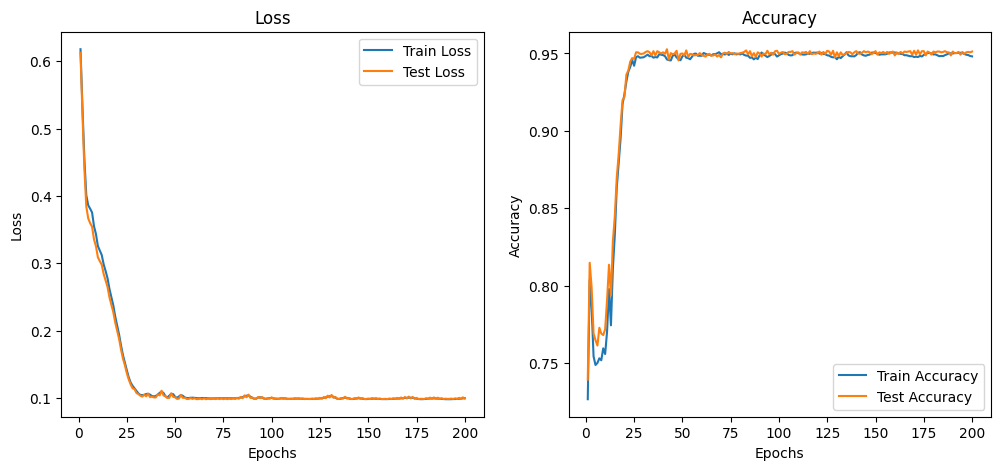

Финальная точность: 95.12%


In [17]:
model = SimpleNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

num_epochs = 200
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

for epoch in range(num_epochs):
    # Тренировка модели
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    # Оценка на тренировочных данных
    model.eval()
    with torch.no_grad():
        train_outputs = model(X_train_tensor)
        train_loss = criterion(train_outputs, y_train_tensor).item()
        _, train_predicted = torch.max(train_outputs, 1)
        train_accuracy = accuracy_score(y_train_tensor.cpu().numpy(), train_predicted.cpu().numpy())
        
        # Оценка на тестовых данных
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor).item()
        _, test_predicted = torch.max(test_outputs, 1)
        test_accuracy = accuracy_score(y_test_tensor.cpu().numpy(), test_predicted.cpu().numpy())

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')

# Построение графиков потерь и точности
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()

# Вывод точности на тестовых данных
print(f'Финальная точность: {test_accuracies[-1] * 100:.2f}%')
